# Advanced reference: using `CameraSystem.PROJECTOR_CAMERA` with `pf_dev`

<div class="admonition important alert alert-block alert-warning">

This is an advanced showcase, thus its documentation is scarce. If you're especially interested, feel free to reach out to us.

</div>

In [29]:
import tal

data = tal.io.read_capture('data/tal/plane-exhaustive-16x16x16x16.hdf5')
tal.reconstruct.compensate_laser_cos_dsqr(data)

In [30]:
volume_xyz = tal.reconstruct.get_volume_project_rw(data, depths=[1.0,])

In [31]:
H_1_pf = tal.reconstruct.pf_dev.solve(data, wl_mean=0.25, wl_sigma=0.25, volume_xyz=volume_xyz, camera_system=tal.enums.CameraSystem.DIRECT_LIGHT)

tal.reconstruct.utils: Assuming that volume_xyz is X_Y_Z_3
tal.reconstruct.utils: Optimizing for camera convolutions.
tal.reconstruct.pf_dev: Using 35 wavelengths from 0.1650m to 0.5156m
tal.reconstruct.pf_dev: projector_focus_mode=confocal
tal.reconstruct.pf_dev: Computing FFT for H_0
tal.reconstruct.pf_dev: Will use divide_frequencies implementation


tal.reconstruct.pf_dev divide-frequency: 100%|██████████| 35/35 [00:00<00:00, 56.51it/s]


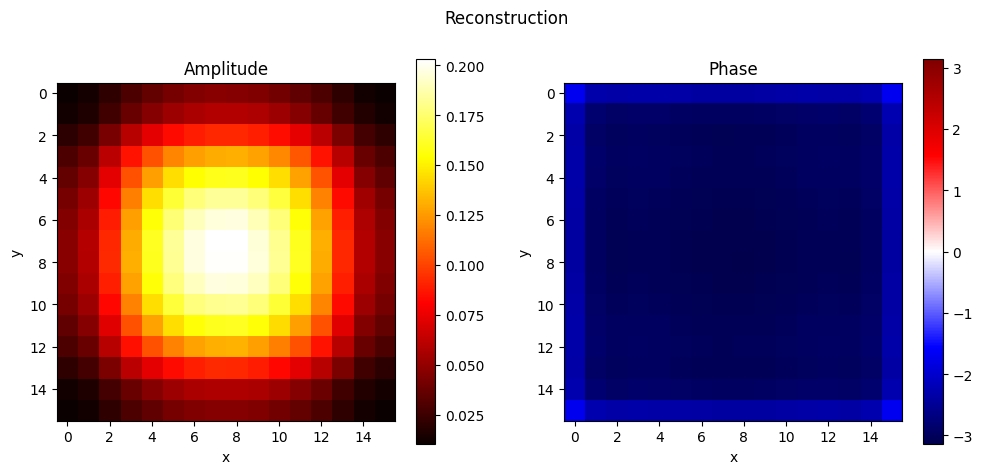

In [32]:
tal.plot.amplitude_phase(H_1_pf, title='Reconstruction')

In [33]:
with tal.resources(cpu_processes=2, downscale=2):
    H_1_pf = tal.reconstruct.pf_dev.solve(data, wl_mean=0.25, wl_sigma=0.25, volume_xyz=volume_xyz, camera_system=tal.enums.CameraSystem.DIRECT_LIGHT)

tal.reconstruct.utils: Assuming that volume_xyz is X_Y_Z_3
tal.reconstruct.utils: Optimizing for camera convolutions.
tal.reconstruct.pf_dev: Using 35 wavelengths from 0.1650m to 0.5156m
tal.reconstruct.pf_dev: projector_focus_mode=confocal
tal.reconstruct.pf_dev: Computing FFT for H_0
tal.resources: Using 2 CPU processes and downscale 2


tal.reconstruct.pf_dev divide-frequency:  18%|█▊        | 3/17 [00:00<00:00, 27.37it/s]

tal.reconstruct.pf_dev: Will use divide_frequencies implementation
tal.resources: Using 2 CPU processes and downscale 2


tal.reconstruct.pf_dev divide-frequency:  83%|████████▎ | 15/18 [00:00<00:00, 44.51it/s]

tal.resources: Using 2 CPU processes and downscale 2


tal.resources progress: 100%|██████████| 2/2 [00:00<00:00, 92182.51it/s]


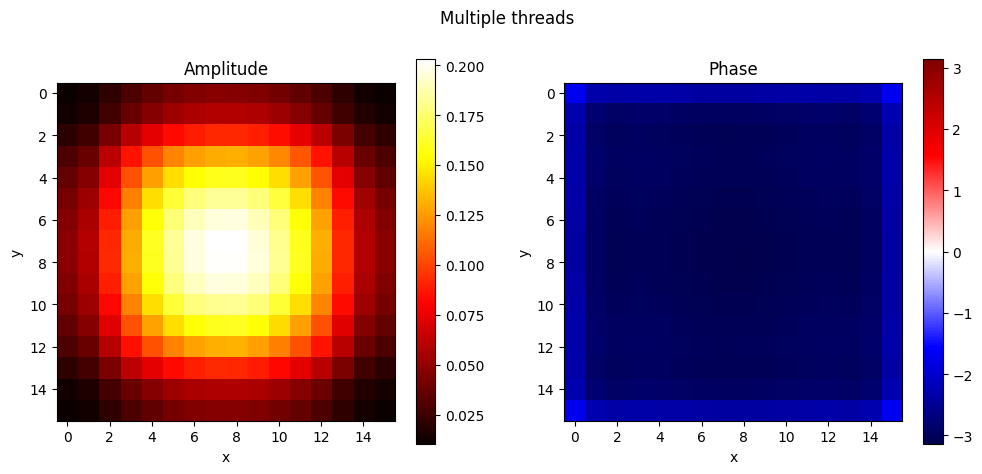

In [34]:
tal.plot.amplitude_phase(H_1_pf, title='Multiple threads')

In [35]:
with tal.resources(cpu_processes=2, downscale=4):
    H_1_pf = tal.reconstruct.pf_dev.solve(data, wl_mean=0.25, wl_sigma=0.25, volume_xyz=volume_xyz, camera_system=tal.enums.CameraSystem.DIRECT_LIGHT)

tal.reconstruct.utils: Assuming that volume_xyz is X_Y_Z_3
tal.reconstruct.utils: Optimizing for camera convolutions.
tal.reconstruct.pf_dev: Using 35 wavelengths from 0.1650m to 0.5156m
tal.reconstruct.pf_dev: projector_focus_mode=confocal
tal.reconstruct.pf_dev: Computing FFT for H_0
tal.resources: Using 2 CPU processes and downscale 4
tal.reconstruct.pf_dev: Will use divide_frequencies implementation
tal.resources: Using 2 CPU processes and downscale 4
tal.resources: Using 2 CPU processes and downscale 4


tal.resources progress: 100%|██████████| 4/4 [00:00<00:00, 209715.20it/s]


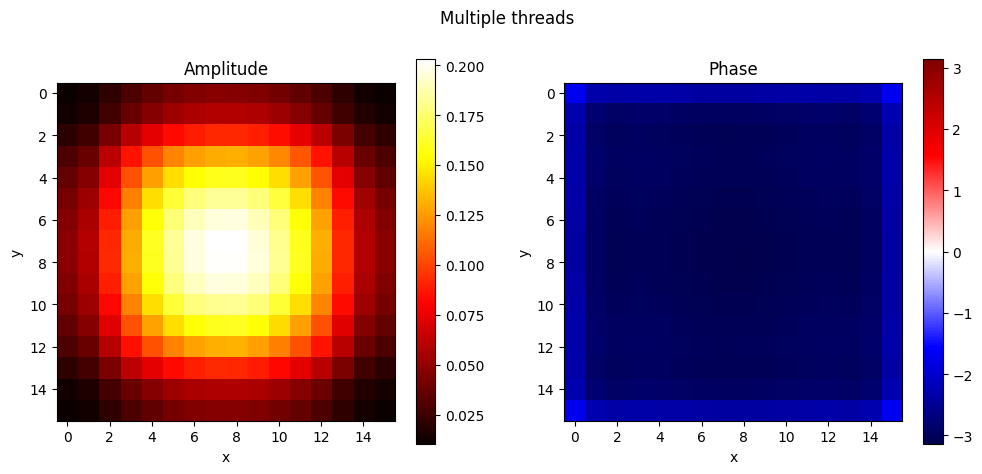

In [36]:
tal.plot.amplitude_phase(H_1_pf, title='Multiple threads')

In [37]:
with tal.resources(cpu_processes=1, downscale=1):
    H_1_pf = tal.reconstruct.pf_dev.solve(data, wl_mean=0.25, wl_sigma=0.25, volume_xyz=volume_xyz,
                                        projector_focus=[0, -0.5, 1],
                                        camera_system=tal.enums.CameraSystem.PROJECTOR_CAMERA_T0)

tal.reconstruct.utils: Assuming that volume_xyz is X_Y_Z_3
tal.reconstruct.utils: Optimizing for camera convolutions.
tal.reconstruct.pf_dev: Using 35 wavelengths from 0.1650m to 0.5156m
tal.reconstruct.pf_dev: projector_focus_mode=single
tal.reconstruct.pf_dev: Computing FFT for H_0
tal.reconstruct.pf_dev: Will use divide_frequencies implementation


tal.reconstruct.pf_dev divide-frequency: 100%|██████████| 35/35 [00:00<00:00, 114.04it/s]


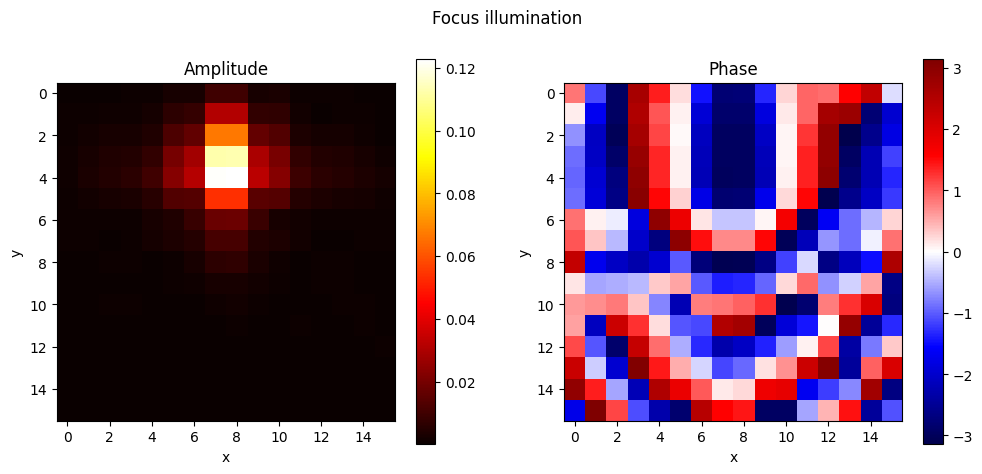

In [38]:
tal.plot.amplitude_phase(H_1_pf, title='Focus illumination')

In [39]:
with tal.resources(cpu_processes=1, downscale=1):
    H_1_pf = tal.reconstruct.pf_dev.solve(data, wl_mean=0.25, wl_sigma=0.25, volume_xyz=volume_xyz,
                                        projector_focus=[-0.5, 0, 1],
                                        camera_system=tal.enums.CameraSystem.PROJECTOR_CAMERA_T0)

tal.reconstruct.utils: Assuming that volume_xyz is X_Y_Z_3
tal.reconstruct.utils: Optimizing for camera convolutions.
tal.reconstruct.pf_dev: Using 35 wavelengths from 0.1650m to 0.5156m
tal.reconstruct.pf_dev: projector_focus_mode=single
tal.reconstruct.pf_dev: Computing FFT for H_0


tal.reconstruct.pf_dev: Will use divide_frequencies implementation


tal.reconstruct.pf_dev divide-frequency: 100%|██████████| 35/35 [00:00<00:00, 112.58it/s]


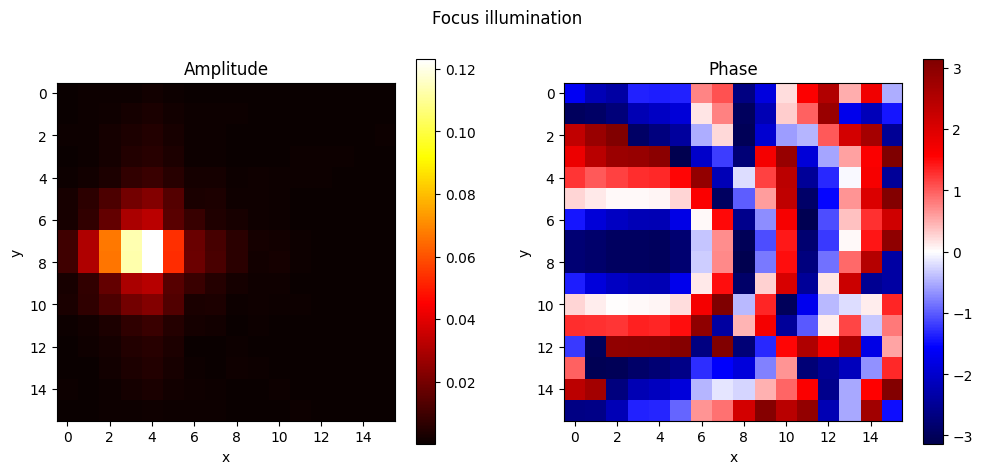

In [40]:
tal.plot.amplitude_phase(H_1_pf, title='Focus illumination')

In [41]:
with tal.resources(cpu_processes=2, downscale=2):
    H_1_pf = tal.reconstruct.pf_dev.solve(data, wl_mean=0.25, wl_sigma=0.25, volume_xyz=volume_xyz,
                                        projector_focus=[data.laser_grid_xyz[9, 8, 0], data.laser_grid_xyz[9, 8, 1], 1],
                                        camera_system=tal.enums.CameraSystem.PROJECTOR_CAMERA_T0)

tal.reconstruct.utils: Assuming that volume_xyz is X_Y_Z_3
tal.reconstruct.utils: Optimizing for camera convolutions.
tal.reconstruct.pf_dev: Using 35 wavelengths from 0.1650m to 0.5156m
tal.reconstruct.pf_dev: projector_focus_mode=single
tal.reconstruct.pf_dev: Computing FFT for H_0
tal.resources: Using 2 CPU processes and downscale 2
tal.reconstruct.pf_dev: Will use divide_frequencies implementation
tal.resources: Using 2 CPU processes and downscale 2
tal.resources: Using 2 CPU processes and downscale 2


tal.resources progress: 100%|██████████| 2/2 [00:00<00:00, 119837.26it/s]


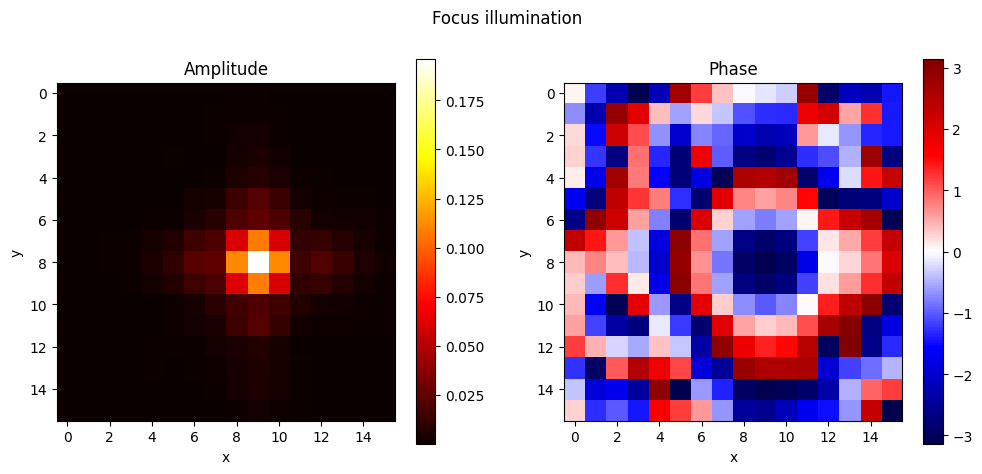

In [42]:
tal.plot.amplitude_phase(H_1_pf, title='Focus illumination')

In [43]:
with tal.resources(cpu_processes=2, downscale=2):
    H_1_pf = tal.reconstruct.pf_dev.solve(data, wl_mean=0.25, wl_sigma=0.25, volume_xyz=volume_xyz,
                                        projector_focus=volume_xyz,
                                        camera_system=tal.enums.CameraSystem.PROJECTOR_CAMERA)

tal.reconstruct.utils: Assuming that volume_xyz is X_Y_Z_3
tal.reconstruct.utils: Optimizing for projector convolutions.
tal.reconstruct.utils: Optimizing for camera convolutions.
tal.reconstruct.pf_dev: Using 35 wavelengths from 0.1650m to 0.5156m
tal.reconstruct.pf_dev: projector_focus_mode=exhaustive
tal.reconstruct.pf_dev: Computing FFT for H_0
tal.resources: Using 2 CPU processes and downscale 2


tal.reconstruct.pf_dev divide-frequency:  33%|███▎      | 6/18 [00:00<00:00, 53.61it/s]

tal.reconstruct.pf_dev: Will use divide_frequencies implementation
tal.resources: Using 2 CPU processes and downscale 2


tal.resources progress: 100%|██████████| 2/2 [00:00<00:00, 106184.91it/s]


tal.resources: Using 2 CPU processes and downscale 2


tal.resources progress: 100%|██████████| 2/2 [00:00<00:00, 63072.24it/s]


In [44]:
print(H_1_pf.shape)

(750, 16, 16, 1, 16, 16, 1)


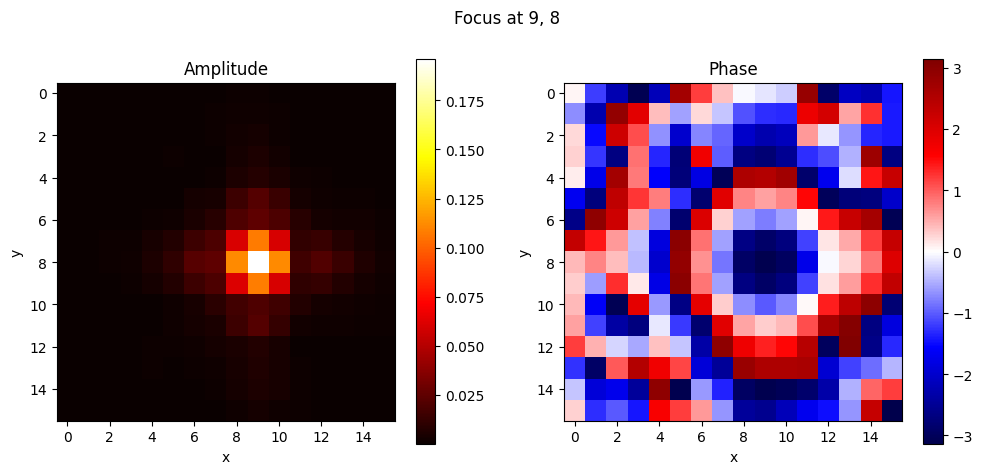

In [45]:
i, j = 9, 8
tal.plot.amplitude_phase(H_1_pf[0, i, j, 0, :, :, 0], title=f'Focus at {i}, {j}')

In [46]:
volume_xyz = tal.reconstruct.get_volume_project_rw(data, depths=[0.95, 1.00, 1.05])
print(volume_xyz.shape)

(16, 16, 3, 3)


In [47]:
with tal.resources(cpu_processes=2, downscale=2):
    H_1_pf = tal.reconstruct.pf_dev.solve(data, wl_mean=0.25, wl_sigma=0.25, volume_xyz=volume_xyz,
                                        projector_focus=[data.laser_grid_xyz[9, 8, 0], data.laser_grid_xyz[9, 8, 1], 1],
                                        camera_system=tal.enums.CameraSystem.PROJECTOR_CAMERA_T0)

tal.reconstruct.utils: Assuming that volume_xyz is X_Y_Z_3
tal.reconstruct.utils: Optimizing for camera convolutions.
tal.reconstruct.pf_dev: Using 35 wavelengths from 0.1650m to 0.5156m
tal.reconstruct.pf_dev: projector_focus_mode=single
tal.reconstruct.pf_dev: Computing FFT for H_0
tal.resources: Using 2 CPU processes and downscale 2


tal.reconstruct.pf_dev divide-frequency: 100%|██████████| 18/18 [00:00<00:00, 114.57it/s]

tal.resources progress: 100%|██████████| 2/2 [00:00<00:00, 142179.80it/s]

tal.reconstruct.pf_dev divide-frequency:   0%|          | 0/17 [00:00<?, ?it/s]

tal.reconstruct.pf_dev: Will use divide_frequencies implementation
tal.resources: Using 2 CPU processes and downscale 2
tal.resources: Using 2 CPU processes and downscale 2
tal.resources: Using 2 CPU processes and downscale 2


tal.reconstruct.pf_dev divide-frequency: 100%|██████████| 18/18 [00:00<00:00, 109.94it/s]

tal.resources progress: 100%|██████████| 2/2 [00:00<00:00, 121574.03it/s]

tal.reconstruct.pf_dev divide-frequency:  65%|██████▍   | 11/17 [00:00<00:00, 105.28it/s]

tal.resources: Using 2 CPU processes and downscale 2
tal.resources: Using 2 CPU processes and downscale 2
tal.resources: Using 2 CPU processes and downscale 2


tal.reconstruct.pf_dev divide-frequency: 100%|██████████| 18/18 [00:00<00:00, 110.60it/s]

tal.resources progress: 100%|██████████| 2/2 [00:00<00:00, 135300.13it/s]

tal.reconstruct.pf_dev Z slices: 100%|██████████| 3/3 [00:03<00:00,  1.24s/it]


In [48]:
print(H_1_pf.shape)

(16, 16, 3)


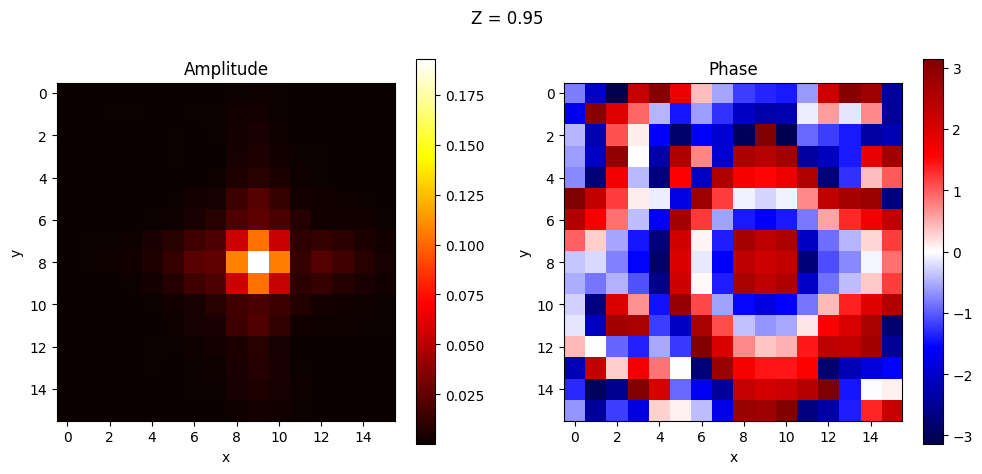

In [49]:
tal.plot.amplitude_phase(H_1_pf[..., 0], title='Z = 0.95')

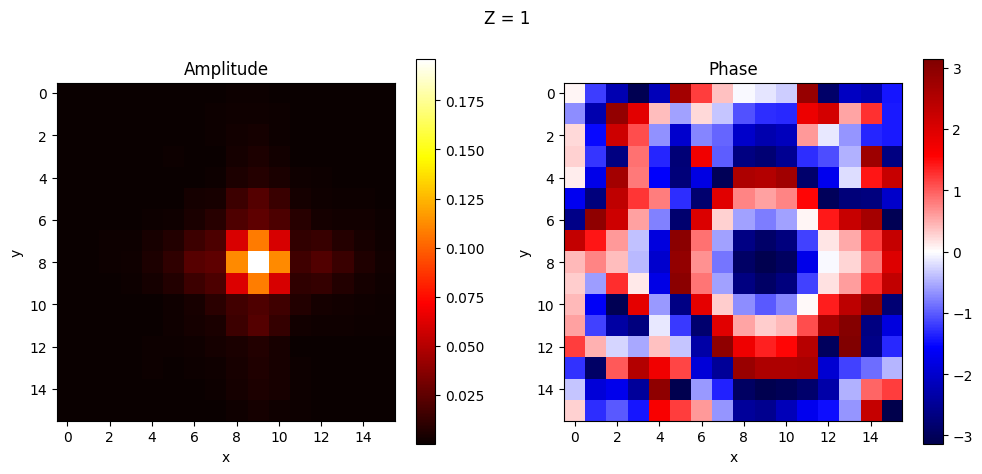

In [50]:
tal.plot.amplitude_phase(H_1_pf[..., 1], title='Z = 1')

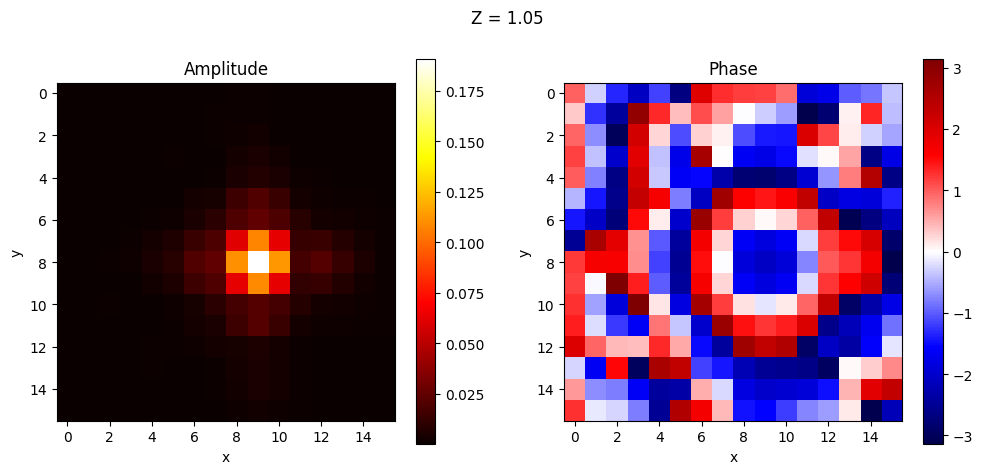

In [51]:
tal.plot.amplitude_phase(H_1_pf[..., 2], title='Z = 1.05')

In [52]:
volume_xyz = tal.reconstruct.get_volume_project_rw(data, depths=1.0)
volume_xyz = volume_xyz.reshape((-1, 3))
print(volume_xyz.shape)

(256, 3)


In [53]:
with tal.resources(cpu_processes=2, downscale=2):
    H_1_pf = tal.reconstruct.pf_dev.solve(data, wl_mean=0.25, wl_sigma=0.25, volume_xyz=volume_xyz, camera_system=tal.enums.CameraSystem.DIRECT_LIGHT)

tal.reconstruct.utils: Assuming that volume_xyz is N_3
tal.reconstruct.pf_dev: You have specified a time-gated camera system with an arbitrary reconstruction volume (that is not parallel to the relay wall). This will work, but the tal.reconstruct.bp or tal.reconstruct.fbp implementations are better suited for these cases.
tal.reconstruct.pf_dev: Using 35 wavelengths from 0.1650m to 0.5156m
tal.reconstruct.pf_dev: projector_focus_mode=confocal
tal.reconstruct.pf_dev: Computing FFT for H_0
tal.resources: Using 2 CPU processes and downscale 2


tal.reconstruct.pf_dev divide-volume:  20%|██        | 7/35 [00:00<00:00, 64.10it/s]

tal.reconstruct.pf_dev: Will use divide_volume implementation
tal.resources: Using 2 CPU processes and downscale 2


tal.reconstruct.pf_dev divide-volume:  60%|██████    | 21/35 [00:00<00:00, 64.41it/s]

tal.resources: Using 2 CPU processes and downscale 2


tal.resources progress: 100%|██████████| 2/2 [00:00<00:00, 152520.15it/s]


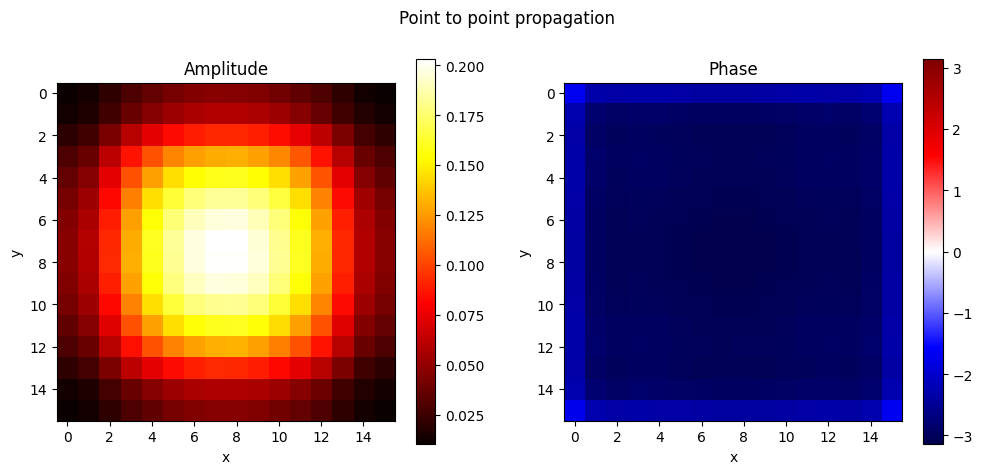

In [54]:
tal.plot.amplitude_phase(H_1_pf.reshape((16, 16)), title='Point to point propagation')

In [55]:
with tal.resources(cpu_processes=2, downscale=2):
    H_1_pf = tal.reconstruct.pf_dev.solve(data, wl_mean=0.25, wl_sigma=0.25, volume_xyz=volume_xyz,
                                        projector_focus=[data.laser_grid_xyz[9, 8, 0], data.laser_grid_xyz[9, 8, 1], 1],
                                          camera_system=tal.enums.CameraSystem.PROJECTOR_CAMERA_T0)

tal.reconstruct.utils: Assuming that volume_xyz is N_3
tal.reconstruct.pf_dev: You have specified a time-gated camera system with an arbitrary reconstruction volume (that is not parallel to the relay wall). This will work, but the tal.reconstruct.bp or tal.reconstruct.fbp implementations are better suited for these cases.
tal.reconstruct.pf_dev: Using 35 wavelengths from 0.1650m to 0.5156m
tal.reconstruct.pf_dev: projector_focus_mode=single
tal.reconstruct.pf_dev: Computing FFT for H_0
tal.resources: Using 2 CPU processes and downscale 2


tal.reconstruct.pf_dev divide-volume:  20%|██        | 7/35 [00:00<00:00, 65.08it/s]

tal.reconstruct.pf_dev: Will use divide_volume implementation
tal.resources: Using 2 CPU processes and downscale 2


tal.reconstruct.pf_dev divide-volume:  60%|██████    | 21/35 [00:00<00:00, 64.51it/s]

tal.resources: Using 2 CPU processes and downscale 2


tal.resources progress: 100%|██████████| 2/2 [00:00<00:00, 135300.13it/s]


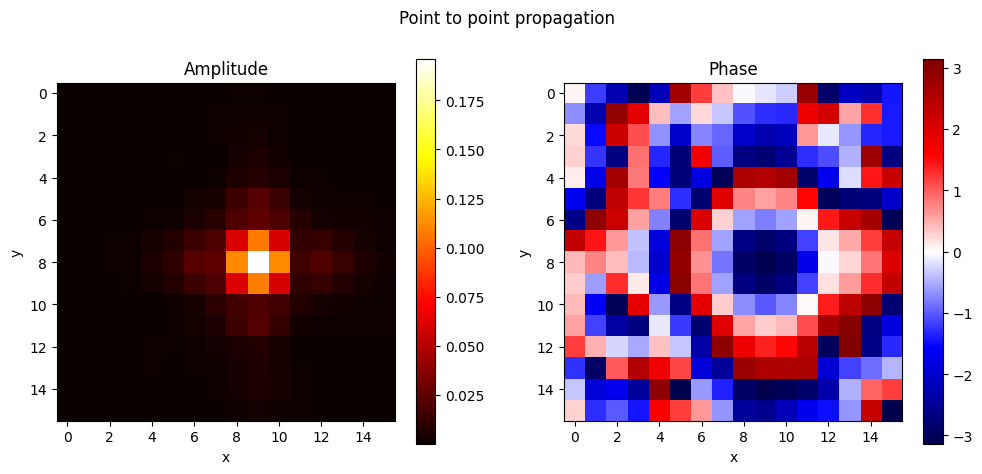

In [56]:
tal.plot.amplitude_phase(H_1_pf.reshape((16, 16)), title='Point to point propagation')